In [ ]:
!pip install ipython-autotime
%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.9 MB/s eta 0:00:00
time: 548 µs (started: 2023-03-08 14:51:24 +00:00)


In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

time: 5.33 s (started: 2023-03-08 15:10:32 +00:00)


In [ ]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3

time: 857 µs (started: 2023-03-08 15:10:42 +00:00)


In [ ]:
from google.colab import drive

time: 734 µs (started: 2023-03-08 15:10:45 +00:00)


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive
time: 26.7 s (started: 2023-03-08 15:10:49 +00:00)


In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/sample/sample",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 1012 files belonging to 3 classes.
time: 408 ms (started: 2023-03-08 15:20:14 +00:00)


In [ ]:
class_names = dataset.class_names
class_names

['a18to35', 'ag35', 'al18']

time: 4.17 ms (started: 2023-03-08 15:20:23 +00:00)


In [ ]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[2 2 2 2 1 2 2 0 2 2 0 2 0 0 2 2 2 2 2 2 2 2 0 2 2 2 0 0 0 2 0 1]
time: 16.1 s (started: 2023-03-08 15:20:27 +00:00)


In [ ]:
import keras,os
from keras.datasets import fashion_mnist, cifar100
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from keras.models import Sequential
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from keras import optimizers
from keras.layers.core import Lambda
from keras import backend as K
from keras import regularizers
from sklearn import datasets # load dataset
from sklearn.model_selection import train_test_split # split dataset 
from sklearn.preprocessing import StandardScaler # standard scaler 
from sklearn.metrics import accuracy_score # check accuracy
import pandas as pd

time: 3.63 ms (started: 2023-03-08 15:20:51 +00:00)


In [ ]:
from keras.datasets import mnist

(train_X, train_Y), (test_X, test_Y) = mnist.load_data()
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255
test_X = test_X / 255
train_X1 = train_X[0:100]
train_Y1 = train_Y[:100]
val_X = train_X[100:150]
val_Y_Onehot = to_categorical(train_Y[100:150])
train_Y_one_hot = to_categorical(train_Y1)
test_Y_one_hot = to_categorical(test_Y)

11490434/11490434 [==============================] - 0s 0us/step
time: 1.19 s (started: 2023-03-08 16:00:37 +00:00)


In [ ]:
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
time: 3.25 s (started: 2023-03-08 16:00:48 +00:00)


In [ ]:
train_X.shape

(60000, 28, 28, 1)

time: 6.31 ms (started: 2023-03-08 16:00:53 +00:00)


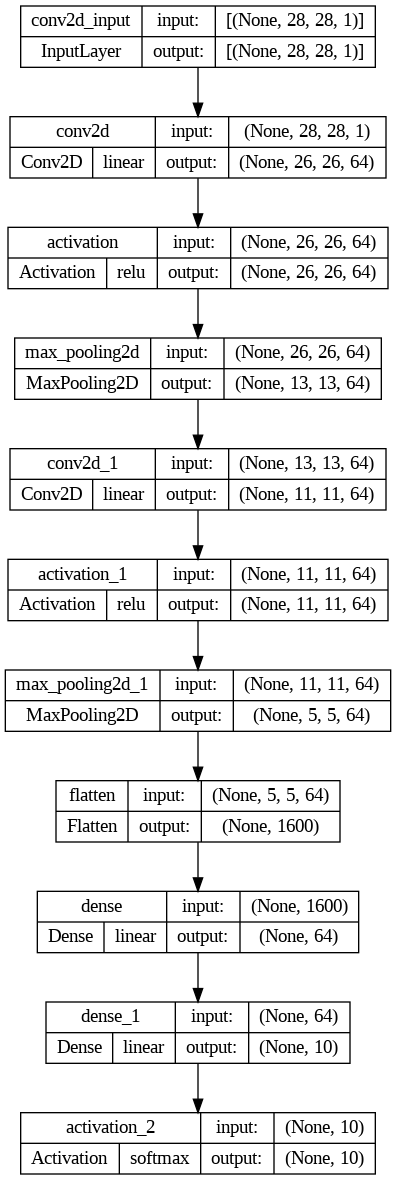

time: 678 ms (started: 2023-03-08 16:08:36 +00:00)


In [ ]:
tf.keras.utils.plot_model(
model,
to_file="model.png",
show_shapes=True,
show_dtype=False,
show_layer_names=True,
rankdir="TB",
expand_nested=True,
dpi=96,
layer_range=None,
show_layer_activations=True,
)

Epoch 1/100
2/2 [==============================] - 2s 428ms/step - loss: 2.2987 - accuracy: 0.0800 - val_loss: 2.1956 - val_accuracy: 0.2400
Epoch 2/100
2/2 [==============================] - 0s 110ms/step - loss: 2.0974 - accuracy: 0.2200 - val_loss: 2.0853 - val_accuracy: 0.3000
Epoch 3/100
2/2 [==============================] - 0s 111ms/step - loss: 1.9212 - accuracy: 0.4100 - val_loss: 1.9030 - val_accuracy: 0.4600
Epoch 4/100
2/2 [==============================] - 0s 110ms/step - loss: 1.7099 - accuracy: 0.5100 - val_loss: 1.6896 - val_accuracy: 0.6000
Epoch 5/100
2/2 [==============================] - 0s 103ms/step - loss: 1.4380 - accuracy: 0.6300 - val_loss: 1.4756 - val_accuracy: 0.6200
Epoch 6/100
2/2 [==============================] - 0s 179ms/step - loss: 1.1522 - accuracy: 0.7600 - val_loss: 1.2822 - val_accuracy: 0.6600
Epoch 7/100
2/2 [==============================] - 0s 110ms/step - loss: 0.8919 - accuracy: 0.8000 - val_loss: 1.0370 - val_accuracy: 0.7000
Epoch 8/100
2

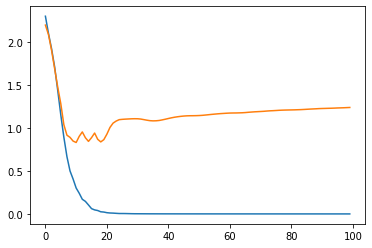

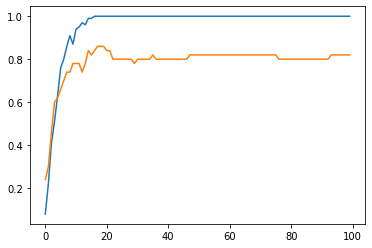

time: 42.3 s (started: 2023-03-08 16:12:18 +00:00)


In [ ]:
# loss and accuracy plot

history = model.fit(train_X1, train_Y_one_hot, batch_size=64, epochs=100, validation_data=(val_X,val_Y_Onehot))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [ ]:
#Evaluate the model on the test data after training your model
score = model.evaluate(test_X[0:100],test_Y_one_hot[0:100], verbose=1)
print('\nKeras CNN binary accuracy:', score[1],'\n')

4/4 [==============================] - 0s 13ms/step - loss: 1.3667 - accuracy: 0.7900

Keras CNN binary accuracy: 0.7900000214576721 

time: 144 ms (started: 2023-03-08 16:13:47 +00:00)
